<a href="https://colab.research.google.com/github/ADITYASHAH-IITP/Measure-of-Diabetes-progression/blob/main/Diabetes_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
print(tf.__version__)

2.7.0


In [3]:
from sklearn.datasets import load_diabetes
diabetes_dataset=load_diabetes() 
print(diabetes_dataset["DESCR"])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [5]:
print(diabetes_dataset.keys())

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])


In [34]:
data=diabetes_dataset["data"]
targets=diabetes_dataset["target"]

In [35]:
targets


array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [36]:
targets=(targets-targets.mean(axis=0))/targets.std()

In [6]:
from sklearn.model_selection import train_test_split
train_data,test_data,train_targets,test_targets=train_test_split(data,targets,test_size=0.1)
print(train_data.shape)
print(test_data.shape)
print(train_targets.shape)
print(test_targets.shape)

(397, 10)
(45, 10)
(397,)
(397,)


In [33]:
print(test_targets)

[-0.01471948  0.3618758  -1.27436574  2.02408942 -0.14457991  1.011178
  1.03715008  0.62159668 -0.4952031   1.55659184  1.20596866 -0.84582629
  2.05006151 -0.26145431  0.64756877 -0.09263574  0.81638734  1.46568953
  1.53061975  1.50464767 -1.31332387  1.81631272  0.10215492  1.58256393
 -0.22249618  0.94624778 -0.89777046 -0.50818915 -1.05360299 -0.32638453
  0.59562459 -0.88478442 -0.01471948 -0.14457991 -0.68999376 -1.28735178
 -1.06658903 -0.50818915  0.1540991  -1.19644947  0.40083393  1.53061975
 -0.96270068  2.06304756  1.36180118]


Callbacks

In [42]:
from tensorflow.keras.callbacks import Callback

class TrainingCallback(Callback):
  def on_train_begin(self,logs=None):
    print("Starting training...")

  def on_train_begin(self,logs=None):
    print("Starting training...")

  def on_epoch_begin(self,epoch,logs=None):
    print(f"Starting epoch{epoch}...")

  def on_train_batch_begin(self,batch,logs=None):
    print(f"Starting Batch training {batch}...")       
    
  def on_train_batch_end(self,batch,logs=None):
    print("End of batch training{batch}...")

  def on_epoch_begin(self,epoch,logs=None):
    print(f"End of Batch training {epoch}...")     

  def on_train_end(self,logs=None):
    print("Finished training...")       

In [44]:
from tensorflow.keras.callbacks import Callback

class TestingCallback(Callback):
  def on_test_begin(self,logs=None):
    print("Starting testing...")

  def on_test_begin(self,logs=None):
    print("Starting testing...")



  def on_test_batch_begin(self,batch,logs=None):
    print(f"Starting Batch testing {batch}...")       
    
  def on_test_batch_end(self,batch,logs=None):
    print("End of batch testing{batch}...")


  def on_test_end(self,logs=None):
    print("Finished testing...")     

In [45]:
from tensorflow.keras.callbacks import Callback

class PredictionCallback(Callback):
  def on_predict_begin(self,logs=None):
    print("Starting predict...")

  def on_predict_begin(self,logs=None):
    print("Starting predict...")



  def on_predict_batch_begin(self,batch,logs=None):
    print(f"Starting Batch predict {batch}...")       
    
  def on_predict_batch_end(self,batch,logs=None):
    print("End of batch predict{batch}...")


  def on_predict_end(self,logs=None):
    print("Finished predict...")   

Build Model

In [7]:
from tensorflow.keras.models  import Sequential
from tensorflow.keras.layers import Dense,Flatten,Softmax,Conv2D,MaxPooling2D,Dropout
from tensorflow.keras import regularizers

In [44]:
def get_regularised_model(wd,rate):
  model=Sequential([
                    Dense(128,kernel_regularizer=regularizers.l2(wd),activation='relu',input_shape=(train_data.shape[1],)),
                    Dropout(rate),
                    Dense(128,kernel_regularizer=regularizers.l2(wd),activation='relu'),
                    Dropout(rate),
                    Dense(128,kernel_regularizer=regularizers.l2(wd),activation='relu'),
                    Dropout(rate),
                    
                    Dense(128,kernel_regularizer=regularizers.l2(wd),activation='relu'),
                    Dense(1)
  ])
  return model
model=get_regularised_model(1e-6,0.56)

In [46]:
def getmodel():
  model=Sequential([
                    Dense(128,activation='relu',input_shape=(train_data.shape[1],)),
                    Dense(128,activation='relu'),
                    Dense(128,activation='relu'),
                    
                    Dense(128,activation='relu'),
                    Dense(1)
  ])
  return model
model=getmodel()

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 128)               1408      
                                                                 
 dense_8 (Dense)             (None, 128)               16512     
                                                                 
 dense_9 (Dense)             (None, 128)               16512     
                                                                 
 dense_10 (Dense)            (None, 128)               16512     
                                                                 
 dense_11 (Dense)            (None, 128)               16512     
                                                                 
 dense_12 (Dense)            (None, 128)               16512     
                                                                 
 dense_13 (Dense)            (None, 1)                

In [46]:
model.compile(optimizer="adam",loss="mse",metrics=["mae"])

In [43]:
history=model.fit(train_data,train_targets,epochs=3,batch_size=128,validation_split=0.15,verbose=False,callbacks=[TrainingCallback()])

Starting training...
End of Batch training 0...
Starting Batch training 0...
End of batch training{batch}...
Starting Batch training 1...
End of batch training{batch}...
Starting Batch training 2...
End of batch training{batch}...
End of Batch training 1...
Starting Batch training 0...
End of batch training{batch}...
Starting Batch training 1...
End of batch training{batch}...
Starting Batch training 2...
End of batch training{batch}...
End of Batch training 2...
Starting Batch training 0...
End of batch training{batch}...
Starting Batch training 1...
End of batch training{batch}...
Starting Batch training 2...
End of batch training{batch}...
Finished training...


In [34]:
model.evaluate(test_data,test_targets,verbose=2)

2/2 - 0s - loss: 0.3822 - mae: 0.5185 - 20ms/epoch - 10ms/step


[0.3822028338909149, 0.5185195207595825]

In [48]:
model.evaluate(test_data,test_targets,verbose=False,callbacks=[TestingCallback()])

Starting testing...
Starting Batch testing 0...
End of batch testing{batch}...
Starting Batch testing 1...
End of batch testing{batch}...
Finished testing...


[0.8688074946403503, 0.787440836429596]

In [49]:
model.predict(test_data,verbose=False,callbacks=[PredictionCallback()])

Starting predict...
Starting Batch predict 0...
End of batch predict{batch}...
Starting Batch predict 1...
End of batch predict{batch}...
Finished predict...


array([[0.02394536],
       [0.02611406],
       [0.0314544 ],
       [0.02579872],
       [0.02634114],
       [0.03356683],
       [0.02664038],
       [0.02798058],
       [0.0253697 ],
       [0.02916073],
       [0.03081506],
       [0.0305932 ],
       [0.0314163 ],
       [0.02677316],
       [0.02040855],
       [0.02965745],
       [0.03110197],
       [0.02528995],
       [0.02778071],
       [0.03243035],
       [0.02704193],
       [0.02580317],
       [0.02730309],
       [0.02539958],
       [0.02726768],
       [0.02945923],
       [0.02893423],
       [0.0299076 ],
       [0.02833239],
       [0.03001698],
       [0.03080209],
       [0.03257049],
       [0.03113746],
       [0.02522583],
       [0.02650622],
       [0.02724263],
       [0.03183592],
       [0.02893299],
       [0.03182098],
       [0.02986338],
       [0.02690372],
       [0.02746176],
       [0.03071503],
       [0.02621109],
       [0.0320631 ]], dtype=float32)

Early Stopping/Patience

In [47]:
unregularized_model=getmodel()
unregularized_model.compile(optimizer='adam',loss='mse')
unreg_history=unregularized_model.fit(train_data,train_targets,epochs=100,validation_split=0.15,batch_size=64,verbose=False,callbacks=[tf.keras.callbacks.EarlyStopping(patience=2)])


In [48]:
unregularized_model.evaluate(test_data,test_targets,verbose=2)

2/2 - 0s - loss: 0.5885 - 16ms/epoch - 8ms/step


0.5885471701622009

In [49]:
regularized_model= get_regularised_model(1e-8,0.25)
regularized_model.compile(optimizer='adam',loss='mse')
reg_history=regularized_model.fit(train_data,train_targets,epochs=100,validation_split=0.15,batch_size=64,verbose=False,callbacks=[tf.keras.callbacks.EarlyStopping(patience=2)])

In [50]:
regularized_model.evaluate(test_data,test_targets,verbose=2)

2/2 - 0s - loss: 0.5475 - 16ms/epoch - 8ms/step


0.5475212335586548

In [19]:
import matplotlib.pyplot as plt


Text(0.5, 0, 'reg_history Epochs')

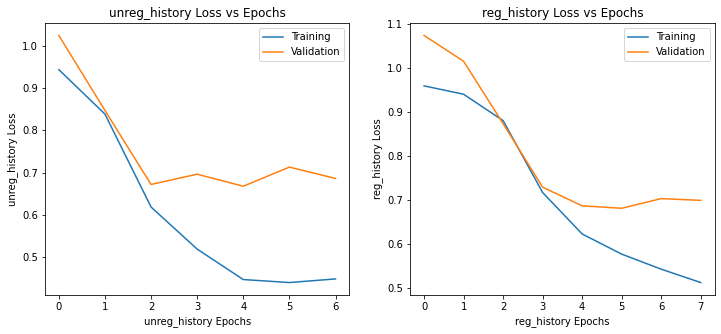

In [43]:
fig=plt.figure(figsize=(12,5))
fig.add_subplot(121)
plt.plot(unreg_history.history['loss'],label='Training')
plt.plot(unreg_history.history['val_loss'],label='Validation')
plt.legend()
plt.title('unreg_history Loss vs Epochs')
plt.ylabel('unreg_history Loss')
plt.xlabel('unreg_history Epochs')

fig.add_subplot(122)
plt.plot(reg_history.history['loss'],label='Training')
plt.plot(reg_history.history['val_loss'],label='Validation')
plt.legend()
plt.title('reg_history Loss vs Epochs')
plt.ylabel('reg_history Loss')
plt.xlabel('reg_history Epochs')


#Overfitting happening in above case